In [1]:
# import python libraries and packages
import matplotlib.pyplot as plt
%matplotlib inline  
from  matplotlib import style
import pandas as pd
import numpy as np
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
df = pd.read_csv('breweries.csv', encoding="latin1")

In [3]:
df.head()

,id,address,categories,city,country,hours,keys,latitude,longitude,menus,name,postalCode,province,twitter,websites
0,AVweN1T_ByjofQCxwSPL,Syr Airport,Brewery,Syracuse,US,NaN,us/ny/syracuse/syrairport/2098450797,NaN,NaN,NaN,Adirondack Pub,NaN,NY,NaN,NaN
1,AVwdkF9ZIN2L1WUfxDfw,1320 N Doctor Martin Luther King Dr,Office and Cafeteria Brewer's Hill,Milwaukee,US,NaN,us/wi/milwaukee/1320ndoctormartinlutherkingdr/...,NaN,NaN,NaN,The Waterfront Cafe,53212,WI,NaN,NaN
2,AVwdlPkf_7pvs4fz7TMr,608 4th St,Brewery Downtown Clovis,Clovis,US,"[{""day"":""Wed - Sat"",""hour"":""5:00 PM - 8:00 PM""}]",us/ca/clovis/6084thst/-932885010,NaN,NaN,NaN,559 Local Brewing,93612,CA,NaN,http://fresnobrewing.com
3,AVwcucY0kufWRAb5yWbU,1103 Mills St,breweries & brew pubs,Black Earth,US,NaN,us/wi/blackearth/1103millsst/-757413411,43.138995,-89.747904,NaN,Shack The,53515-9454,WI,NaN,NaN
4,AVweCkd5kufWRAb5_eaI,130 W Riverside Dr,Brewery and Gastropub Downtown Jeffersonville,Jeffersonville,US,"[{""day"":""Wed - Thu"",""hour"":""3:00 PM - 9:00 PM""...",us/utica/jeffersonville/130wriversidedr/787280564,NaN,NaN,NaN,Flat12 Bierworks,47130,Utica,flat12bierwerks,http://flat12.me/brewery


In [4]:
kdf = df.drop(['hours','keys','menus','city', 'province','postalCode','websites','categories','id','country','name','twitter','address'], axis=1)

In [5]:
kdf.head()

,latitude,longitude
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,43.138995,-89.747904
4,NaN,NaN


In [6]:
kdf1 = kdf.dropna()

In [7]:
kdf1.head()

,latitude,longitude
3,43.138995,-89.747904
5,47.734648,-122.149773
8,30.225785,-97.952191
10,44.068416,-71.143910
14,41.514249,-71.315904


In [8]:
kdf1.to_csv("kdf.csv", index=False)

In [9]:
dfa = np.array(kdf1)

In [10]:
from sklearn.cluster import KMeans

a = int(input("Enter desired number of clusters: "))
b = int(input("Enter desired random state: "))
# Number of clusters
dfa_kmeans = KMeans(n_clusters=a, n_init=b)
# Fitting the input data
dfa_kmeans = dfa_kmeans.fit(dfa)
# Getting the cluster labels
dfa_labels = dfa_kmeans.predict(dfa)
# Centroid values
dfa_centroids = dfa_kmeans.cluster_centers_    

Enter desired number of clusters: 15
Enter desired random state: 22


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


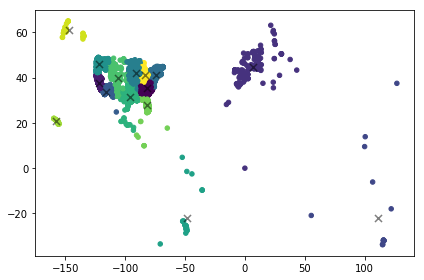

In [11]:
plt.scatter(dfa[:,1], dfa[:,0], c=dfa_labels, s=20, cmap='viridis')

centers = dfa_kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,0], c='black', marker = 'x', s=50, alpha=0.5)

In [12]:
print(dfa_centroids)

[[  35.22486941  -81.96365704]
 [  37.74900884 -121.73464919]
 [  44.89439399    6.56921424]
 [ -21.83744249  111.60496941]
 [  33.67900656 -116.11972274]
 [  41.09778785  -74.60896012]
 [  41.98915754  -90.71843843]
 [  46.15648202 -121.6237217 ]
 [ -21.94926527  -48.6156918 ]
 [  31.47965128  -96.20802951]
 [  39.76017543 -106.29731359]
 [  27.72442101  -81.63415918]
 [  21.04743859 -157.46260067]
 [  60.96961859 -146.84452944]
 [  41.18952063  -83.61008005]]


In [13]:
df_tr = kdf1
df_tr['clusters'] = dfa_labels

/Users/saultamariz/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
df_tr.head()

,latitude,longitude,clusters
3,43.138995,-89.747904,6
5,47.734648,-122.149773,7
8,30.225785,-97.952191,9
10,44.068416,-71.143910,5
14,41.514249,-71.315904,5


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


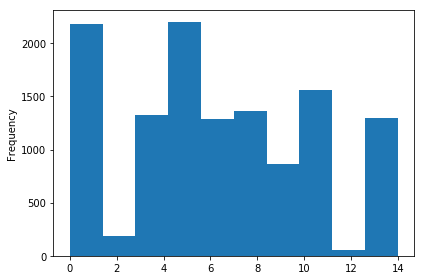

In [15]:
df_tr['clusters'].plot(kind='hist')

In [16]:
#cluster bins 
np.bincount(dfa_labels)

array([ 961, 1221,  191,   20, 1302, 2204, 1289, 1334,   29,  862,  897,
        659,   55,   45, 1255])